In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

font = {'size': 14}

matplotlib.rc('font', **font)


In [2]:
os.listdir('./maml_ens/')

['mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvhwr',
 'mgpu_miniImageNet_order=1_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvvti',
 'mixture_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=mean.csvkwa',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=logprobs.csvnwk',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=logprobs.csvpqf',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvxrt',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=1_pred_mode=mean.csvzuk',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=logprobs.csvdel',
 'mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=mean

In [43]:
def parse_name(filename):
    params = filename.split('_')
    n = params[3][2:]
    k = params[4][2:]
    if params[-3] != 'test':
        predmode = params[-1][:-6]
        n_models = params[-3][7:]
        params = {'n': int(n), 'k' : int(k), 'n_models': int(n_models), 'pred_mode': predmode}
    else:
        predmode = params[-4][:-6]
        n_models = params[-7][7:]
        params = {'n': int(n), 'k' : int(k), 'n_models': int(n_models), 'pred_mode': predmode}
    return params

In [56]:
def draw_one(filename):
    fig = plt.figure(figsize=(24, 10))

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)
    
    params = parse_name(filename)
    n_shot, k_way, n_models = params['n'], params['k'], params['n_models'] 
    
    data = pd.read_csv(os.path.join('maml_ens', filename))
    epochs = data['epoch']
    train_loss = data['loss']
    train_acc = data['categorical_accuracy']
    
    val_acc_str = f'val_{n_shot}-shot_{k_way}-way_acc'
    
    test_loss = data['val_loss']
    test_acc = data[val_acc_str]
    
    
    ax1.plot(epochs, train_loss, color='blue', label='train loss')
    ax1.plot(epochs, test_loss, color='red', label='test loss')
    
    for i in range(n_models):
        val_loss = data[f'val_loss_{i}']
        ax1.plot(epochs, val_loss, '--', alpha=0.4)
    
    ax1.legend()
    ax1.grid(ls=':')
    ax1.set_title('loss')
    
    
    ax2.plot(epochs, train_acc, color='blue', label='train acc')
    ax2.plot(epochs, test_acc, color='red', label='test acc')
    
    for i in range(n_models):
        val_acc = data[val_acc_str + f'_{i}']
        ax2.plot(epochs, val_acc, '--', alpha=0.4)
    
    ax2.legend()
    ax2.grid(ls=':')
    ax2.set_title('accuracy')
    
    fig.suptitle(filename)
    
    
def draw_many(names, labels=None):
    fig = plt.figure(figsize=(24, 10))
    if labels is None:
        labels = [None] * len(names)

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)
    
    for i, filename in enumerate(names):
        params = parse_name(filename)
        n_shot, k_way, n_models, mode = params['n'], params['k'], params['n_models'], params['pred_mode']
    
        data = pd.read_csv(os.path.join('maml_ens', filename))
        epochs = data['epoch']
        
        val_acc_str = f'val_{n_shot}-shot_{k_way}-way_acc'

        test_loss = data['val_loss']
        test_acc = data[val_acc_str]
        
        if labels[i] is None:
            label = f'{n_models} models {mode}'
        else:
            label = labels[i]
        #ax1.plot(epochs, train_loss, color='blue', label='')
        ax1.plot(epochs, test_loss, label=label)

        #ax2.plot(epochs, train_acc, color='blue', label='train acc')
        ax2.plot(epochs, test_acc, label=label)
        
    ax1.legend()
    ax1.grid(ls=':')
    ax1.set_title('loss')

    ax2.legend()
    ax2.grid(ls=':')
    ax2.set_title('accuracy')

    
def draw_detailed(name):
    data = pd.read_csv(os.path.join('maml_ens', name))
    epochs = data['epoch']
    params = parse_name(name)
    train_mode = params['pred_mode']
    
    train_acc_mean = data['categorical_accuracy']
    train_acc_logprobs = data.logprobs_categorical_accuracy

    train_loss_mean = data.loss
    train_loss_logprobs = data.logprobs_loss

    test_acc_mean = data['val_5-shot_5-way_acc']
    test_acc_logprobs = data['val_logprobs_5-shot_5-way_acc']

    test_loss_mean = data.val_loss
    test_loss_logprobs = data.val_logprobs_loss

    fig = plt.figure(figsize=(24, 10))

    ax1, ax2 = fig.subplots(nrows=1, ncols=2)

    ax1.plot(epochs, train_acc_mean, '--', label="train mode", color='blue')
    ax1.plot(epochs, train_acc_logprobs, '--', label='logprobs', color='red')

    ax1.plot(epochs, test_acc_mean, label='val train mode', color="blue")
    ax1.plot(epochs, test_acc_logprobs, label='val logp', color='red')

    ax1.legend()
    ax1.grid(ls=":")
    

    ax2.plot(epochs, train_loss_mean, '--', label='train mode', color='blue')
    ax2.plot(epochs, train_loss_logprobs, '--', label='logprobs', color='red')

    ax2.plot(epochs, test_loss_mean, label='val train mode', color="blue")
    ax2.plot(epochs, test_loss_logprobs, label='val logp', color='red')

    ax2.legend()
    ax2.grid(ls=":")
    
    ax1.set_title('accuracy')
    ax2.set_title('loss')
    fig.suptitle(name)

# 23 июля

### bigger inner lr

In [58]:
exps = """
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_train_pred_mode=mean_test_pred_mode=same.csvlvs
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_train_pred_mode=logprobs_test_pred_mode=same.csvslt
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvzke
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=mean.csvzbs
"""

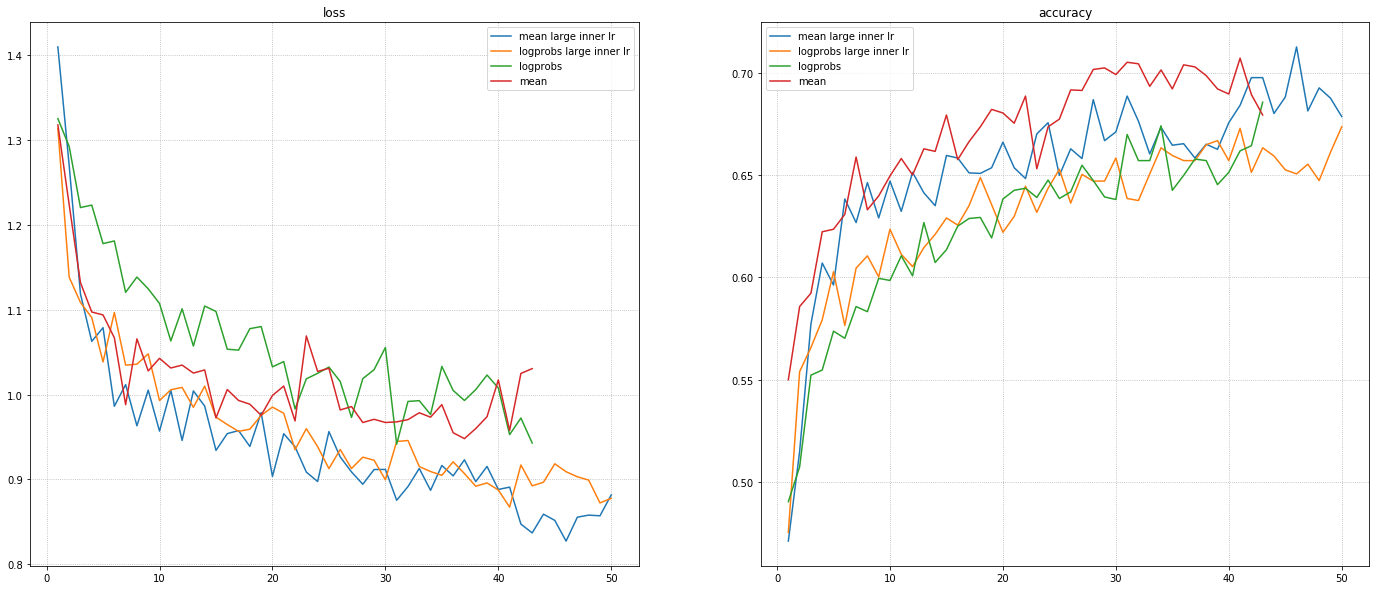

In [60]:
names = exps.split()
labels = ['mean large inner lr', 'logprobs large inner lr', 'logprobs', 'mean']
draw_many(names, labels)

### softmax(mean(logits))

In [50]:
exps = """
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_train_pred_mode=ms_test_pred_mode=same.csvlxy
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_train_pred_mode=ms_test_pred_mode=same.csvjhf
"""

In [51]:
names = exps.split()

In [52]:
names += [exp] 

In [48]:
names += names_old

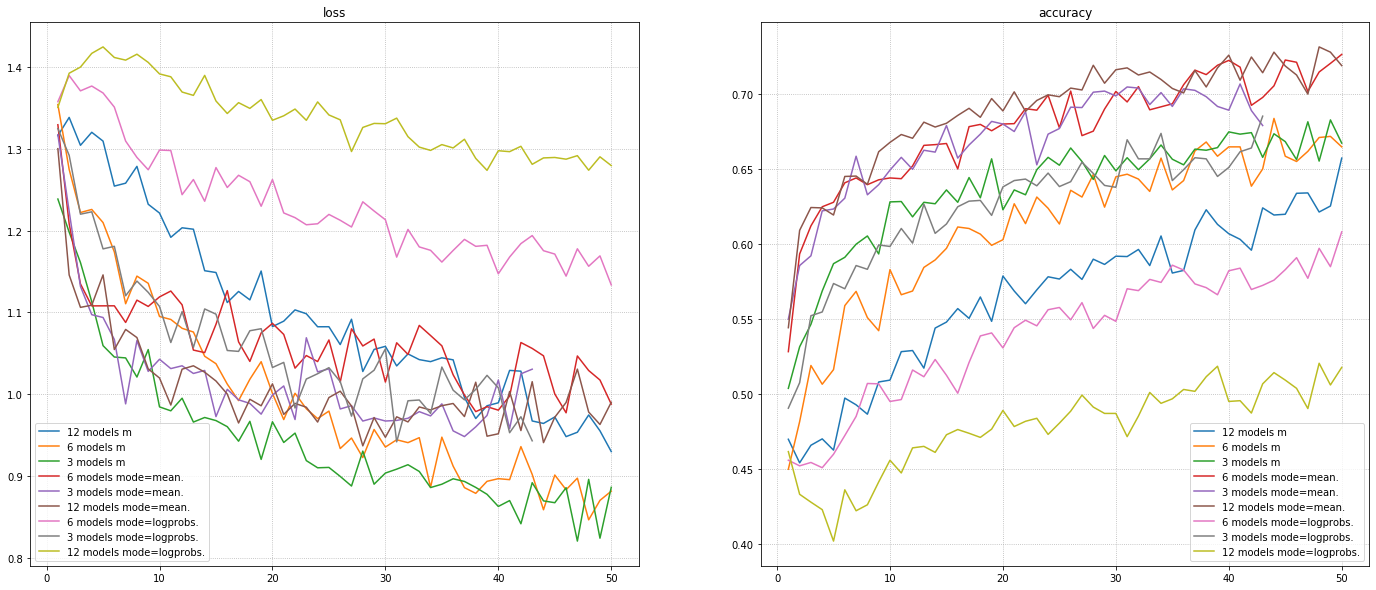

In [49]:
draw_many(names)

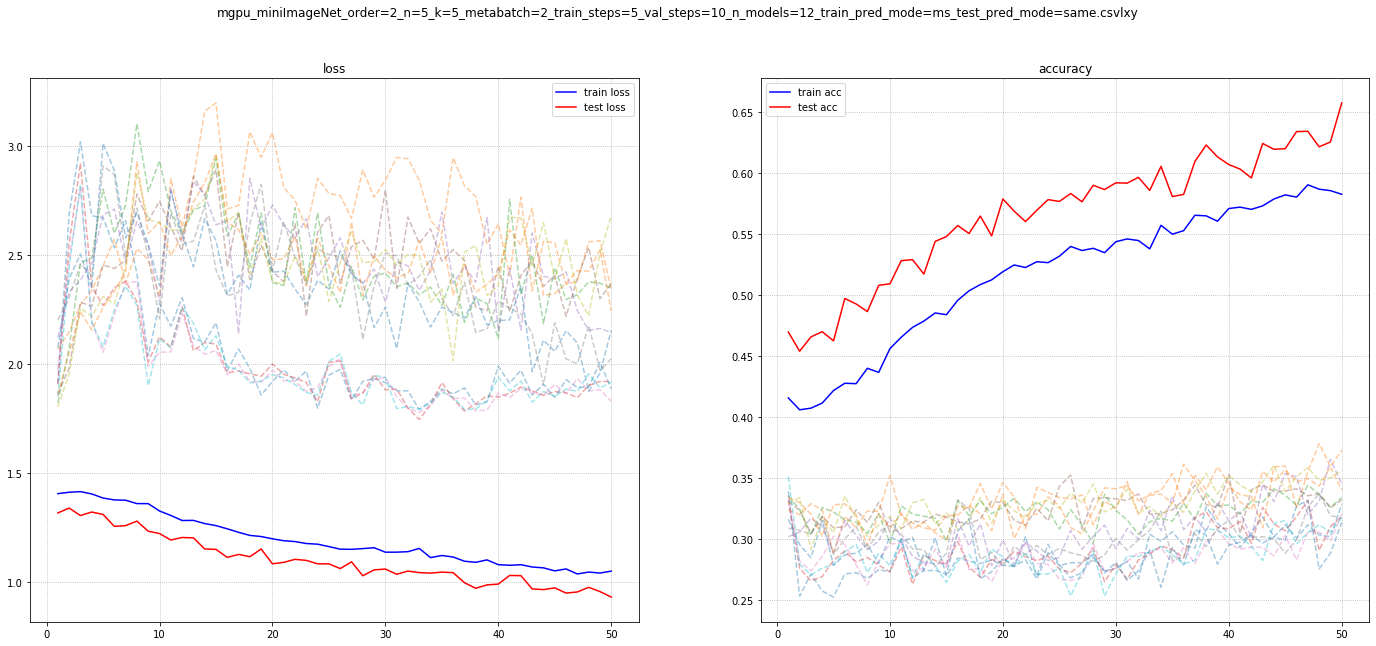

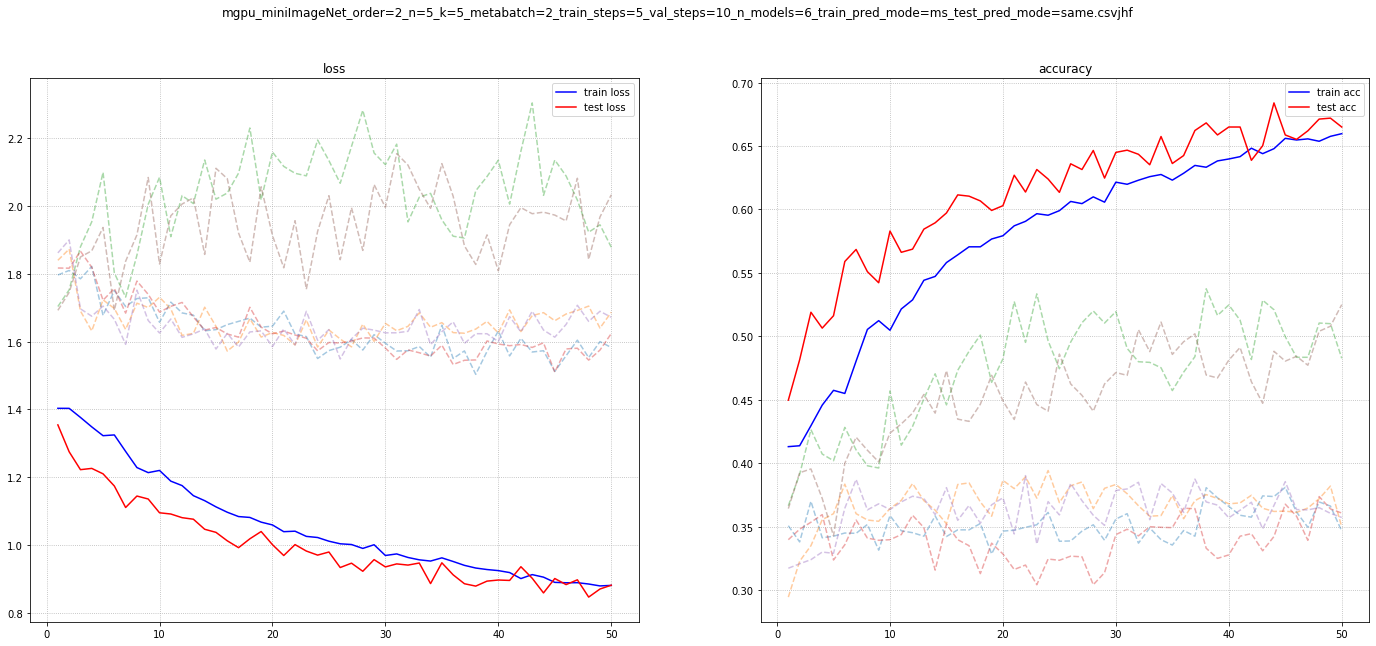

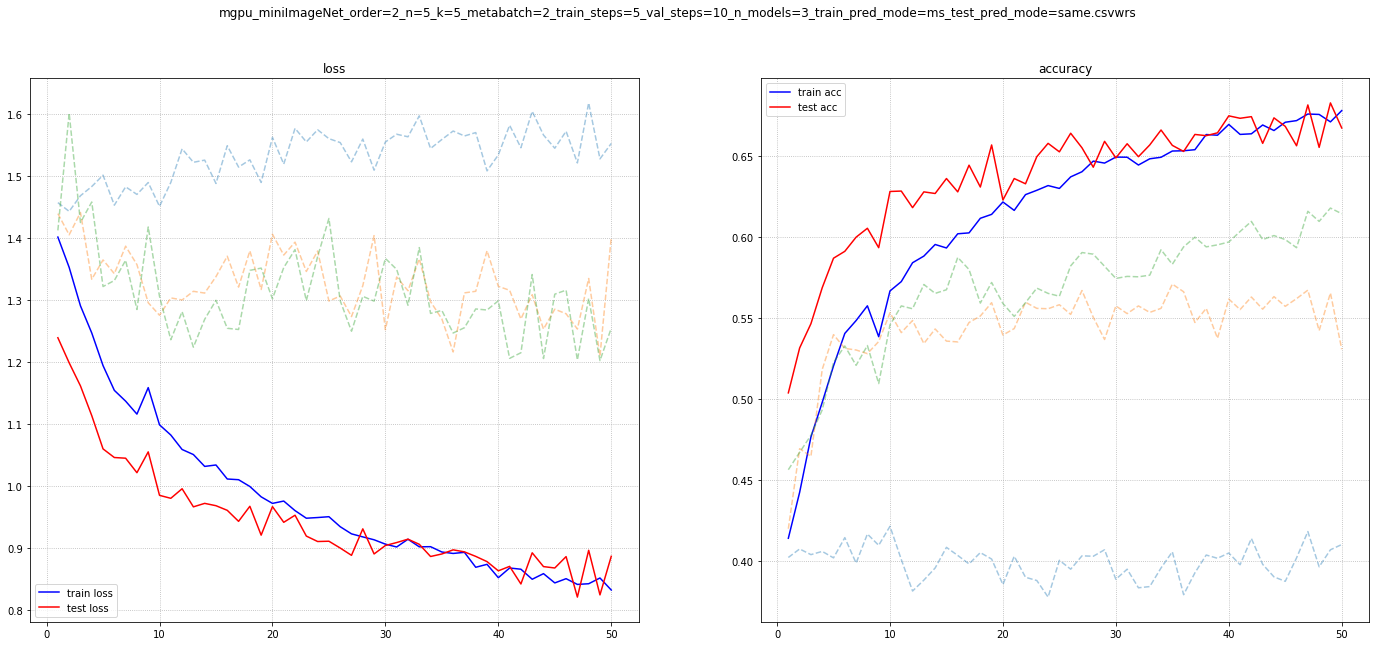

In [53]:
for name in names:
    draw_one(name)

#  21 июля

In [7]:
exp = "mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_train_pred_mode=ms_test_pred_mode=same.csvwrs"

In [40]:
exps = [exp] + names

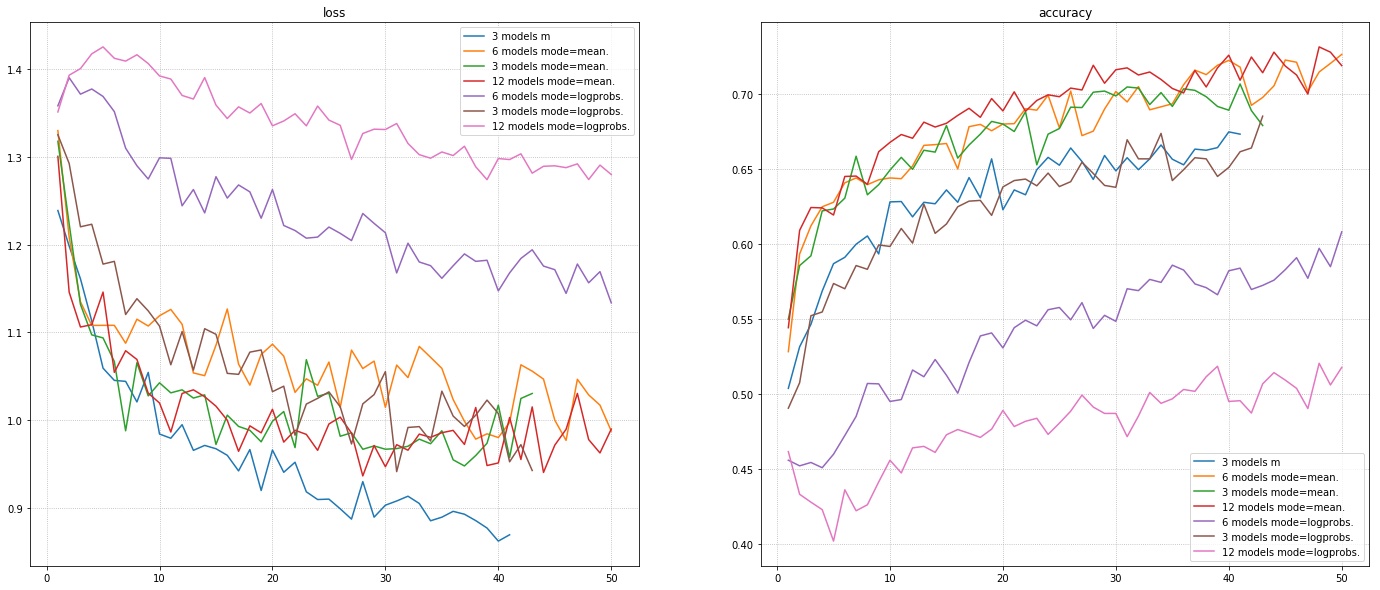

In [43]:
draw_many(exps)

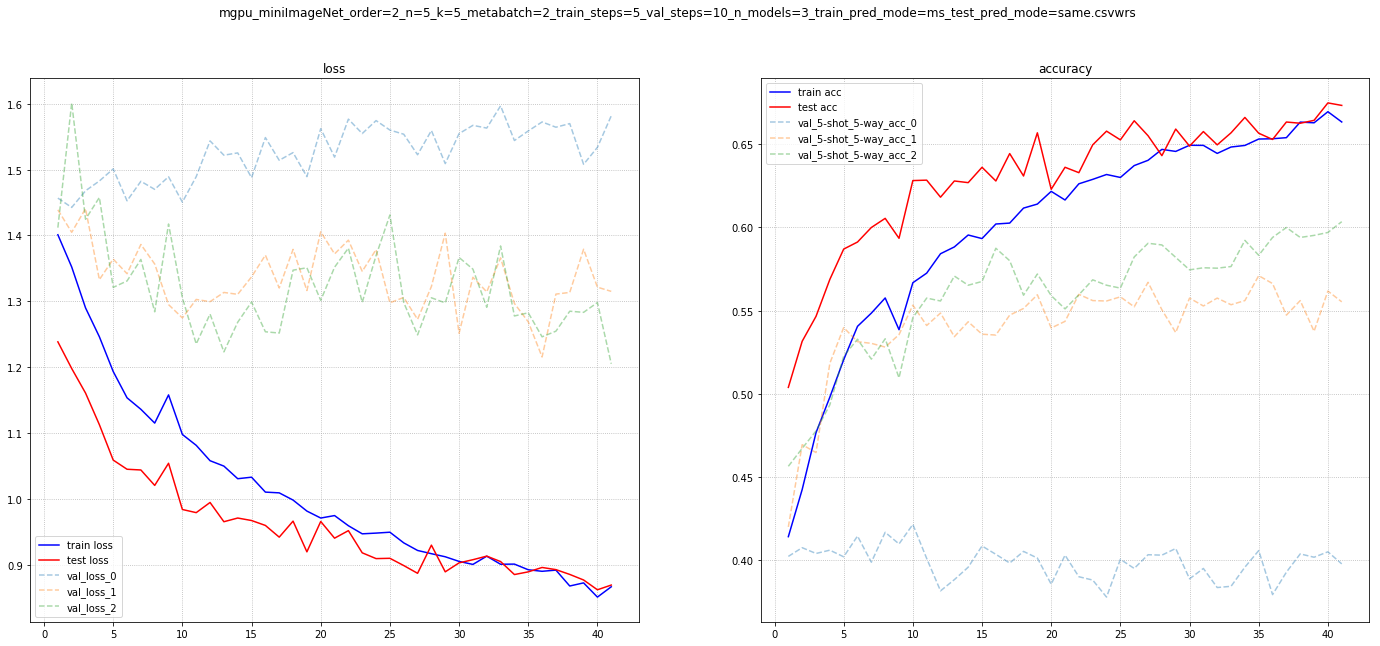

In [44]:
draw_one(exp)

# 12 июля:

In [11]:
exps = """
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=mean.csvxcd
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=mean.csvzbs
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=mean.csvjyj
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=6_pred_mode=logprobs.csvnwk
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=3_pred_mode=logprobs.csvzke
mgpu_miniImageNet_order=2_n=5_k=5_metabatch=2_train_steps=5_val_steps=10_n_models=12_pred_mode=logprobs.csvstj"""


In [12]:
names_old = exps.split()

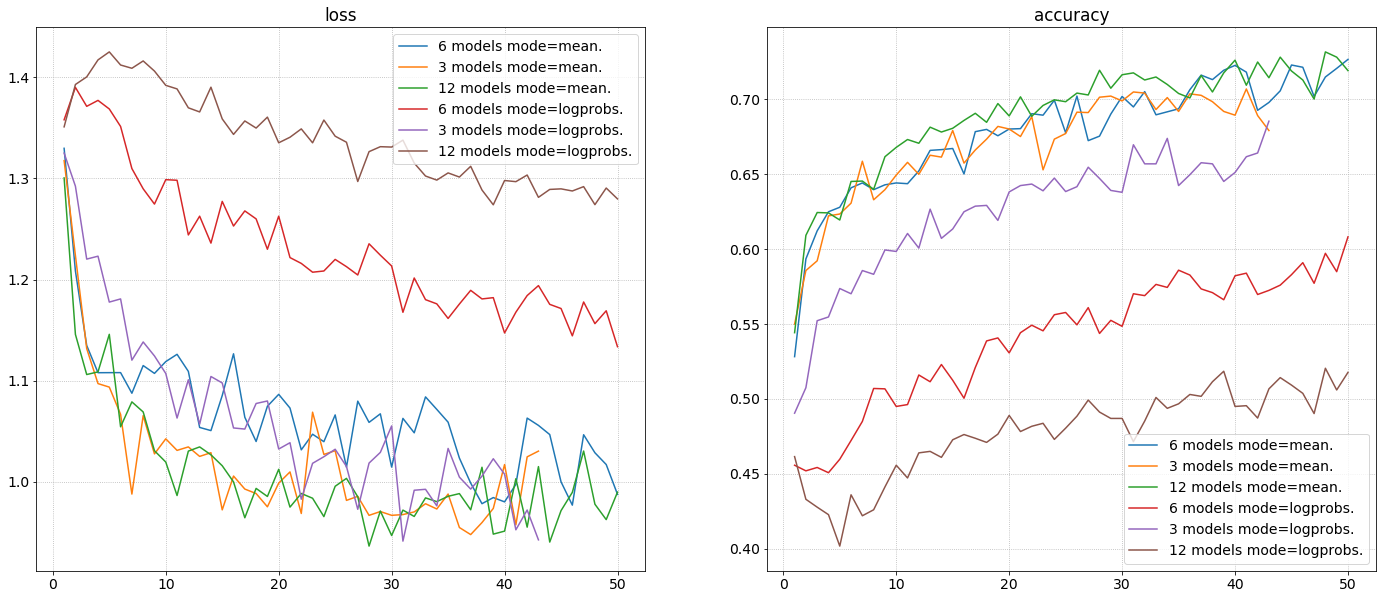

In [21]:
draw_many(names)

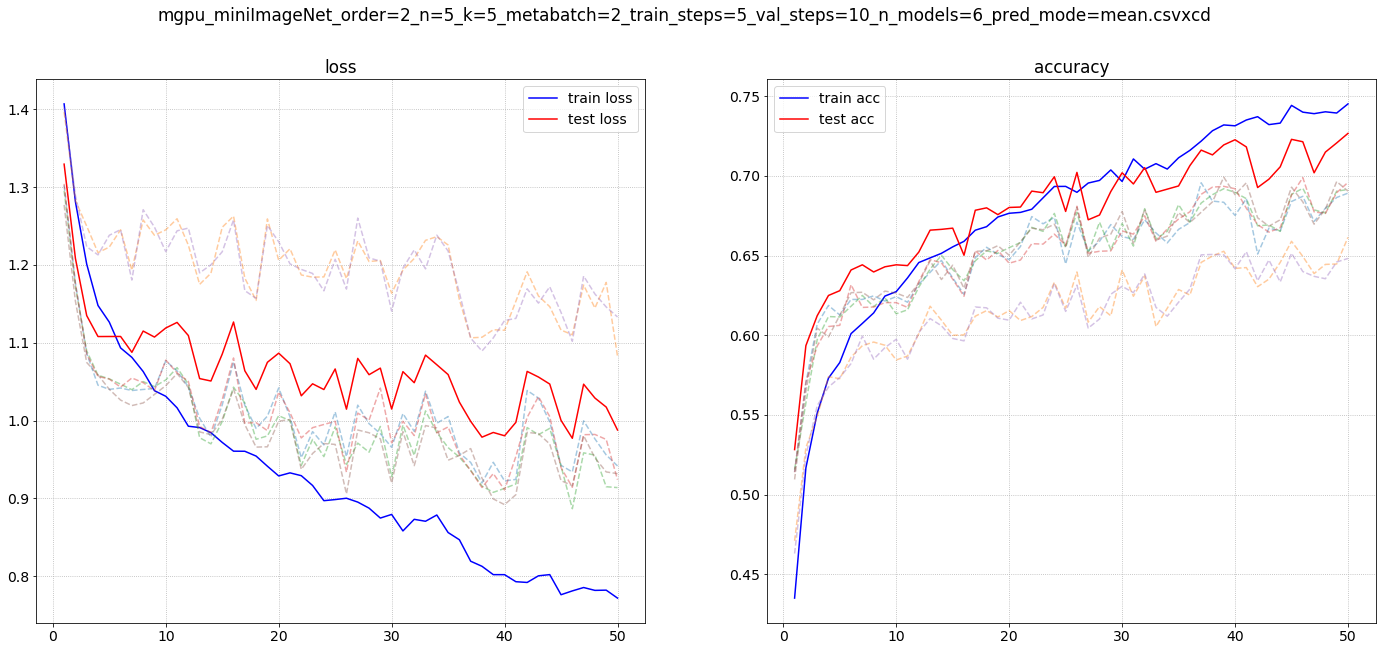

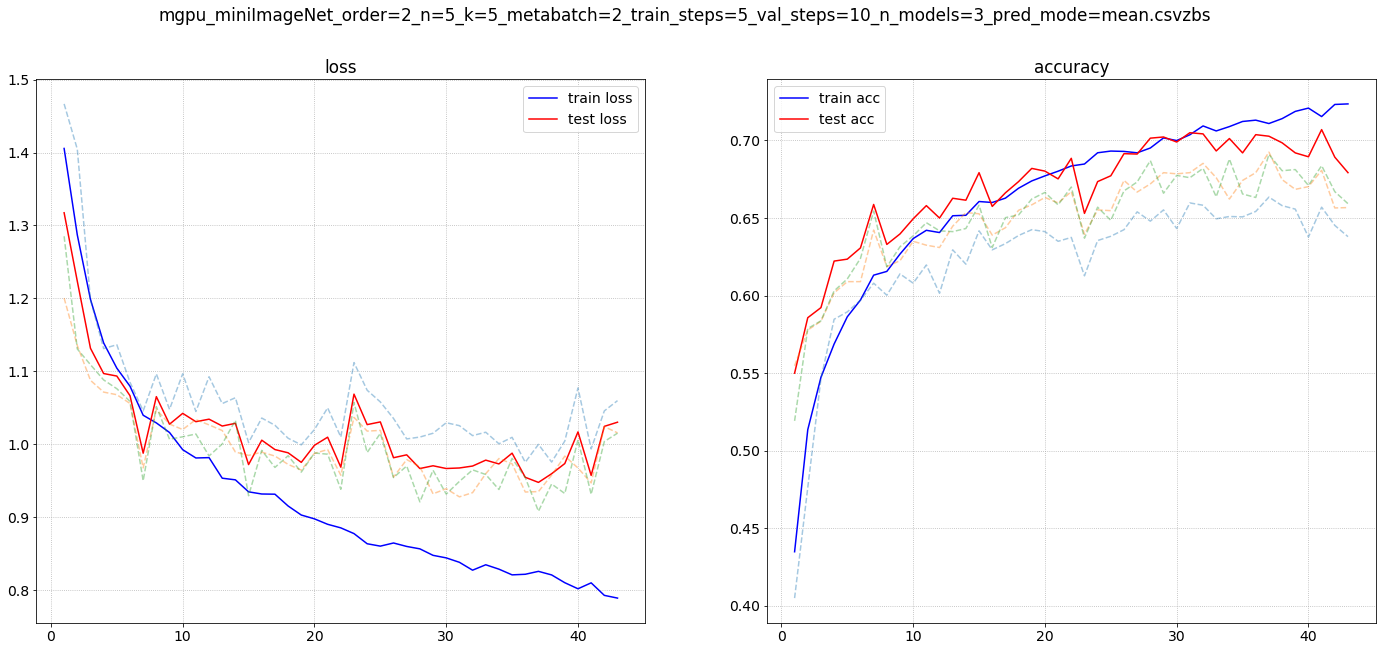

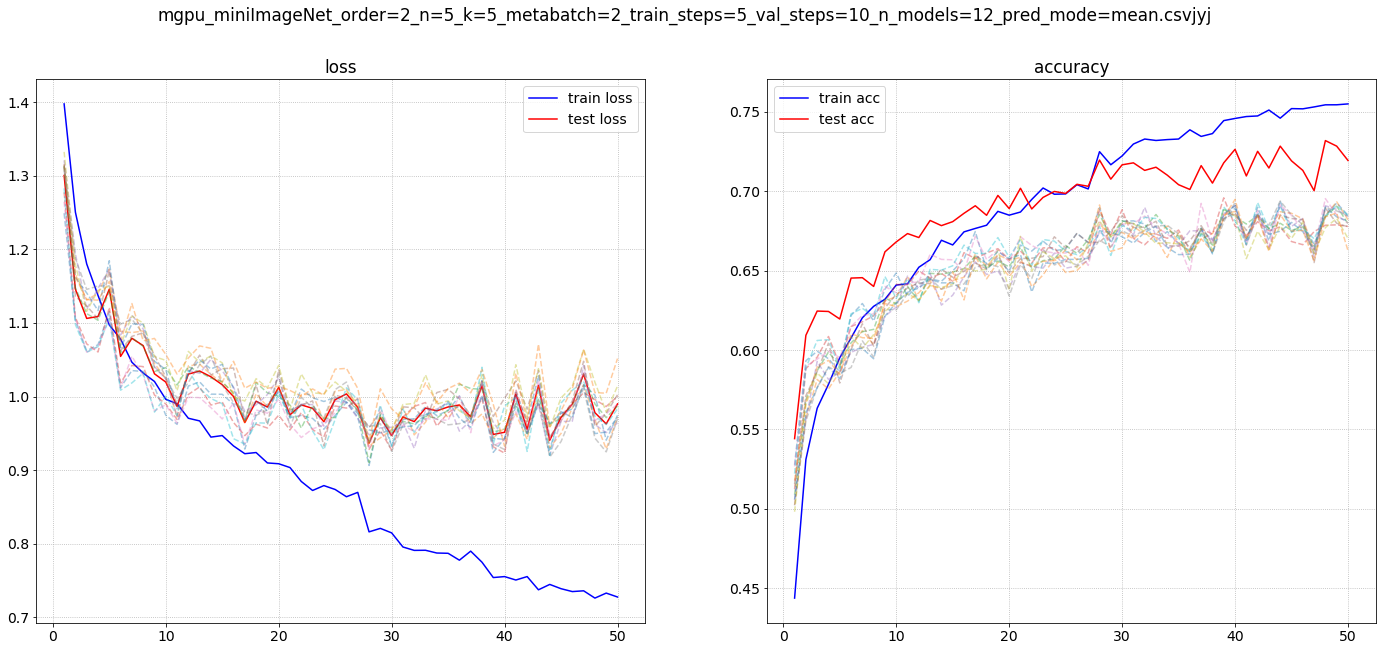

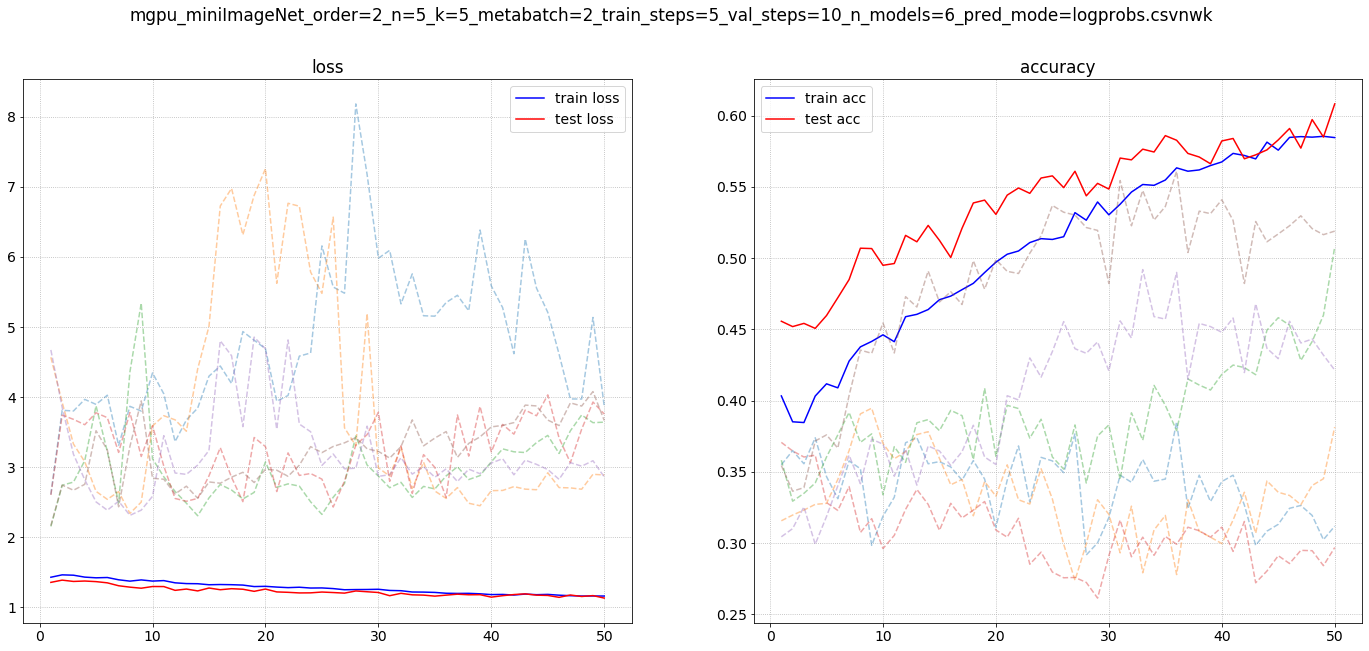

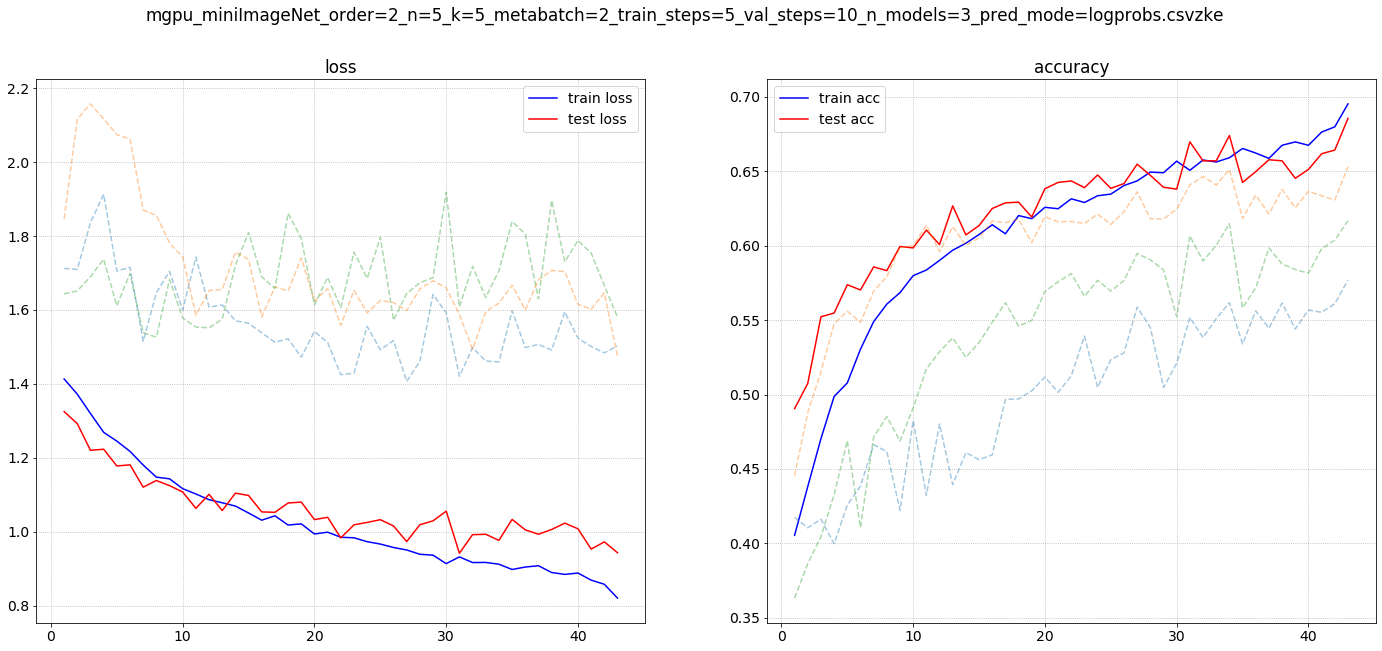

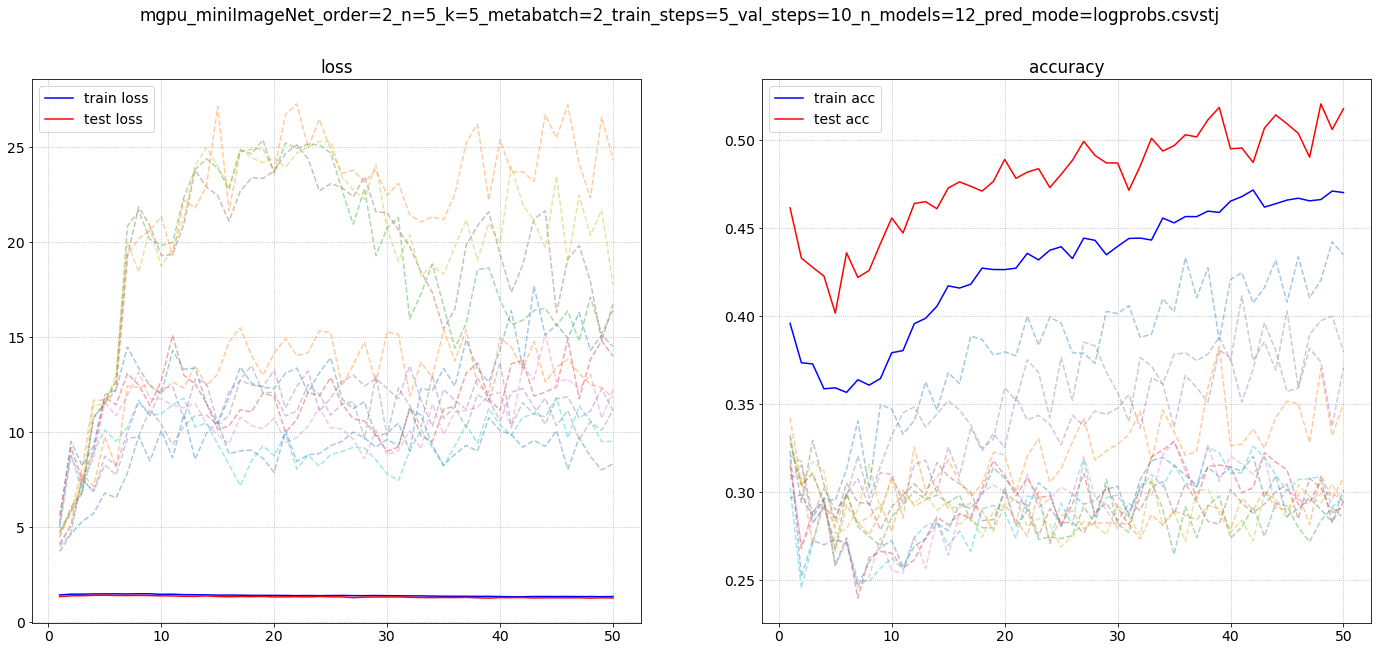

In [22]:
for name in names:
    draw_one(name)

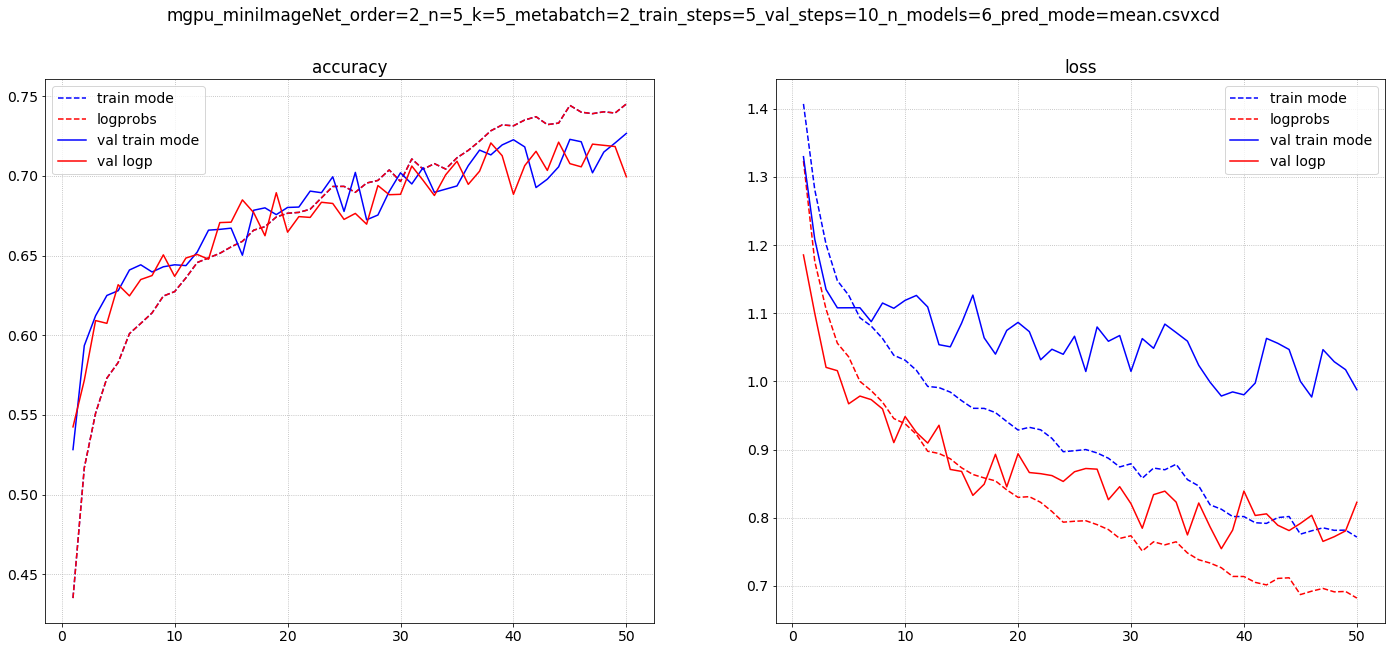

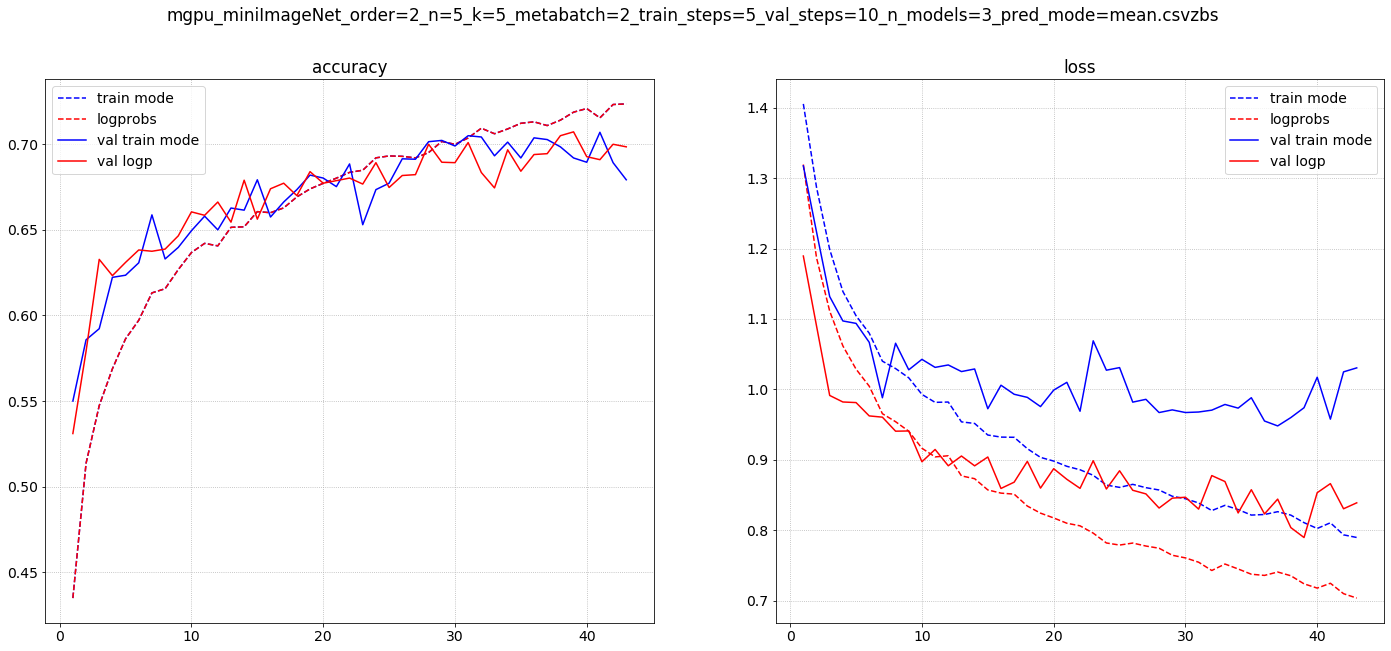

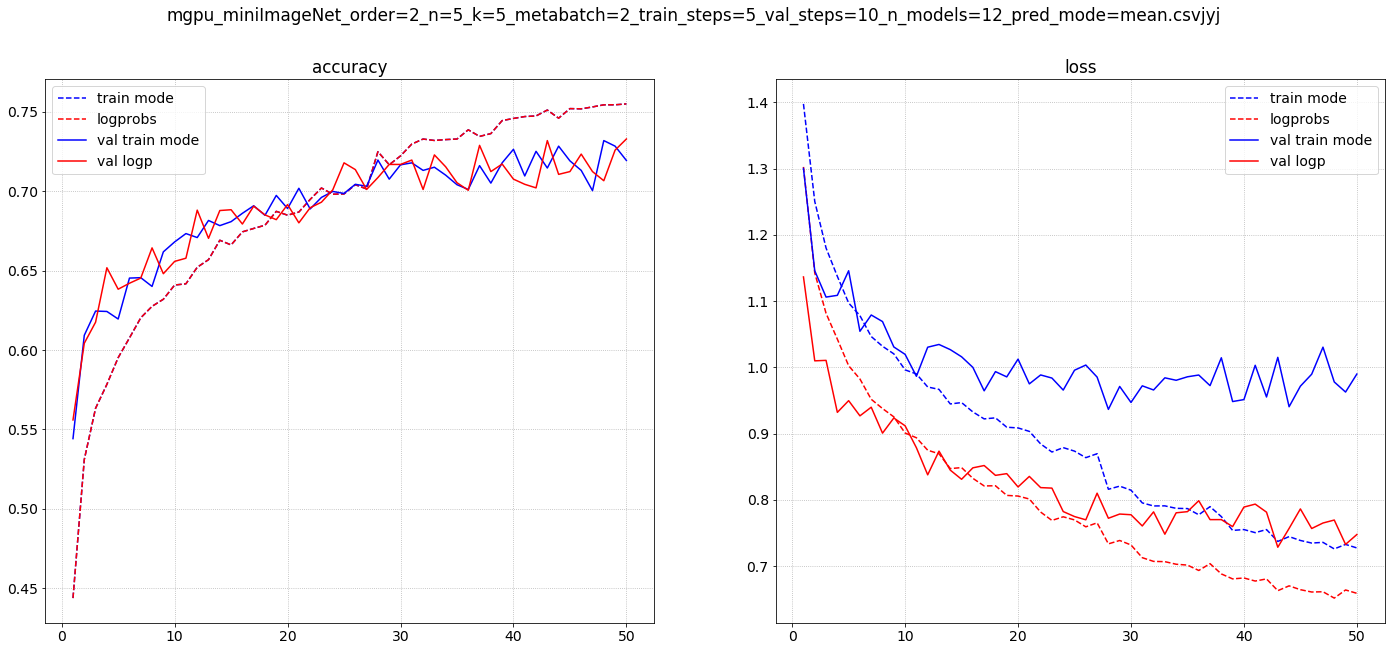

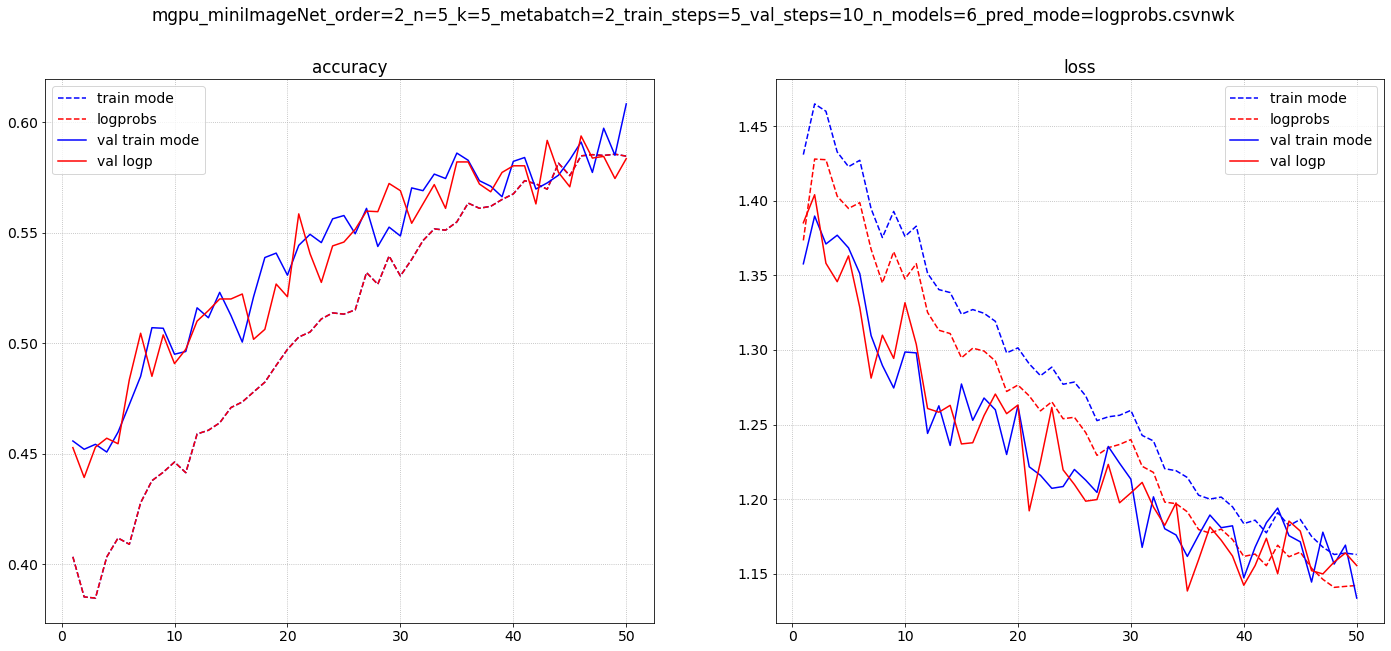

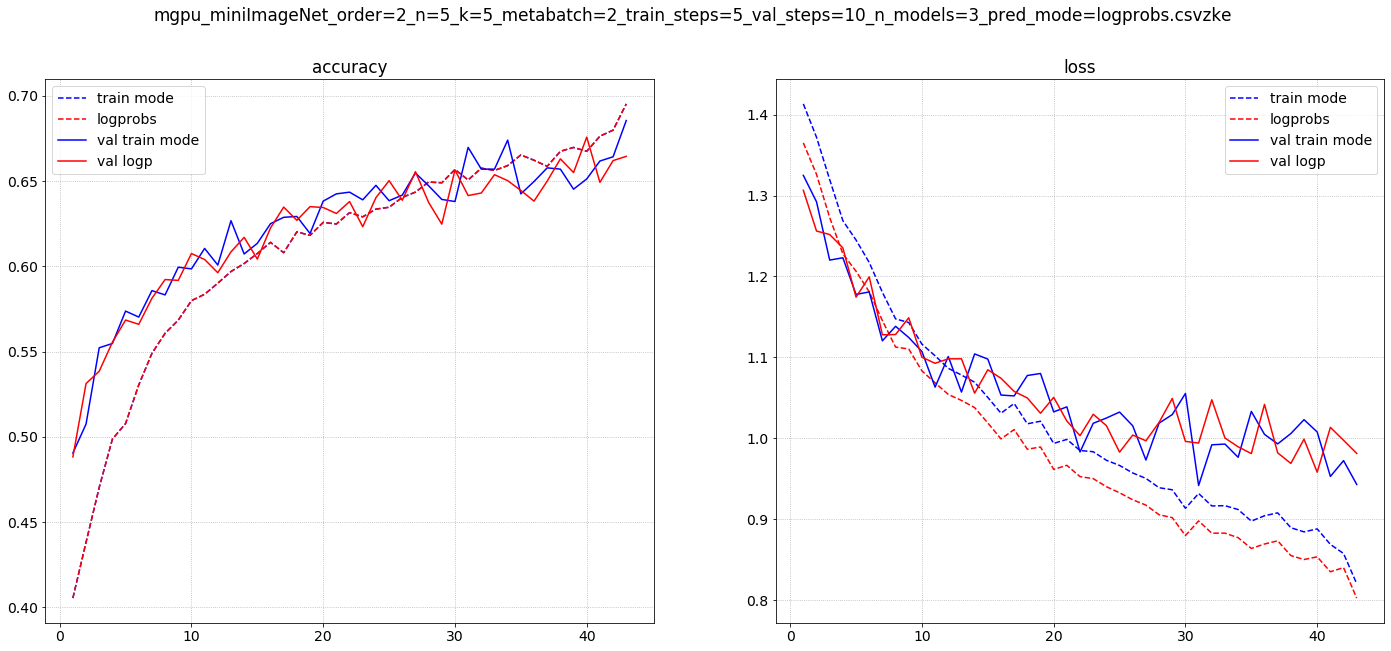

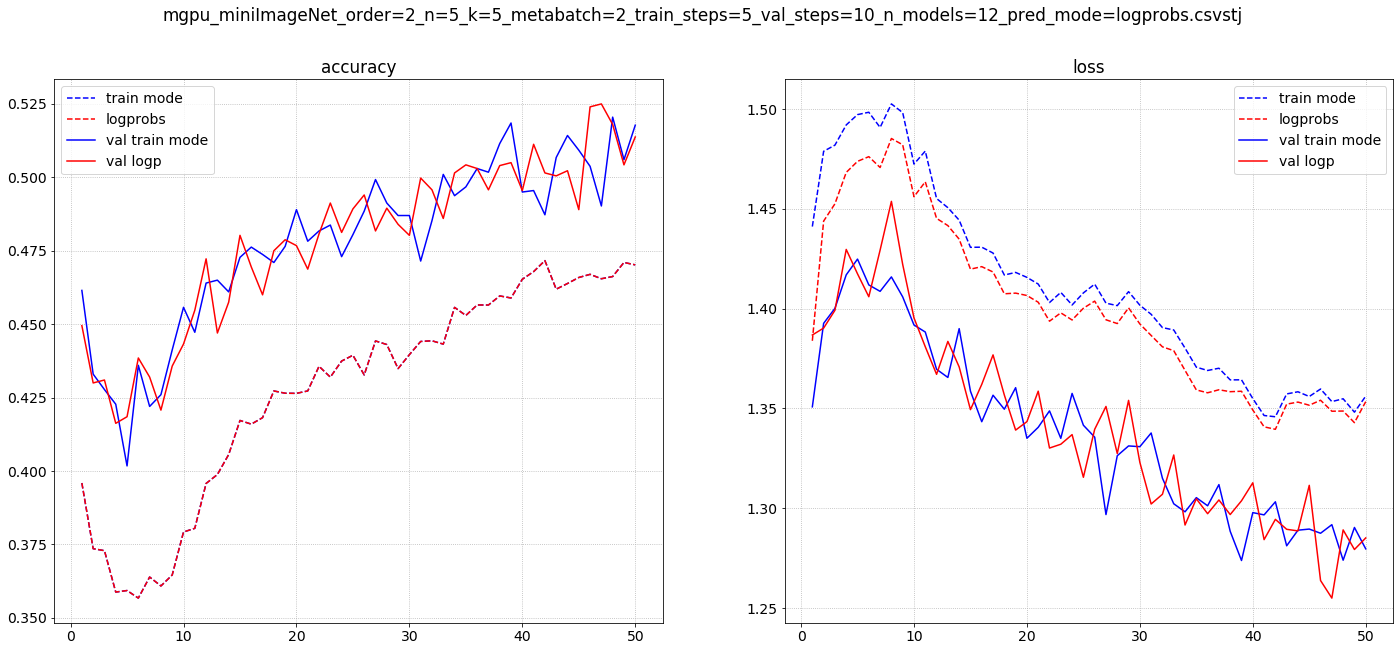

In [24]:
for name in names:
    draw_detailed(name)

# 7 июля:

In [19]:
names = os.listdir('maml_ens/')

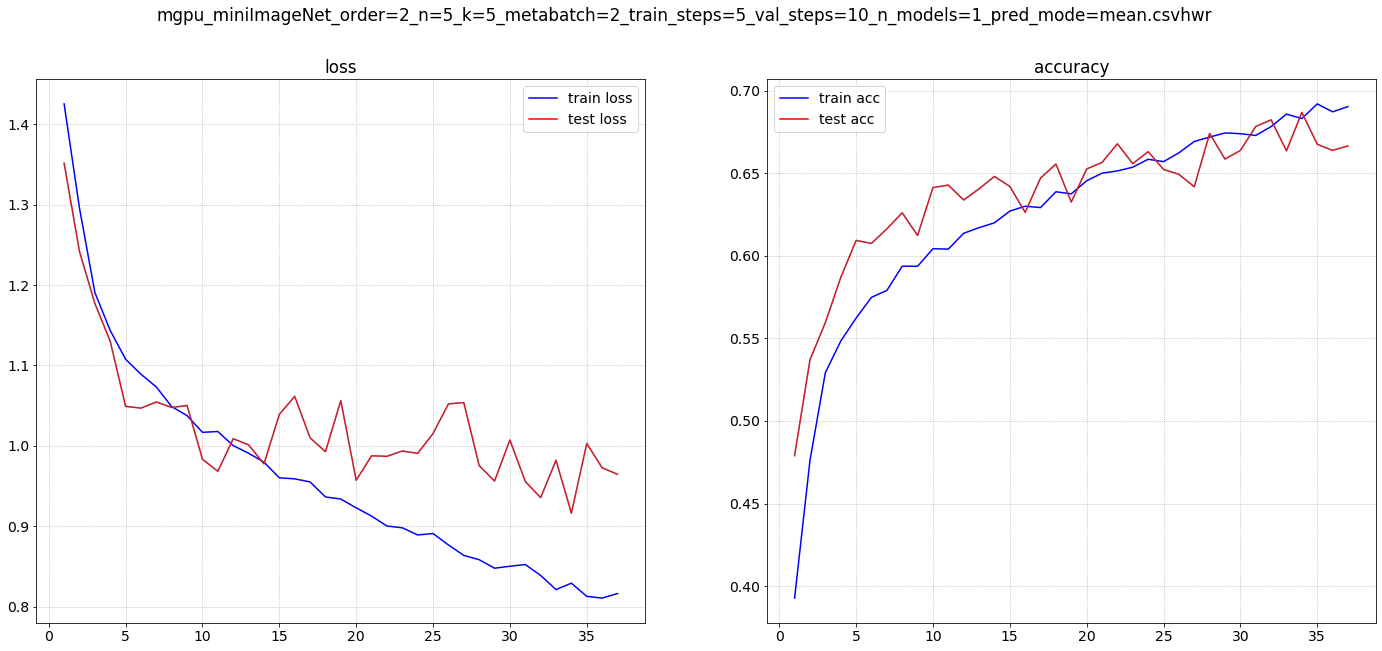

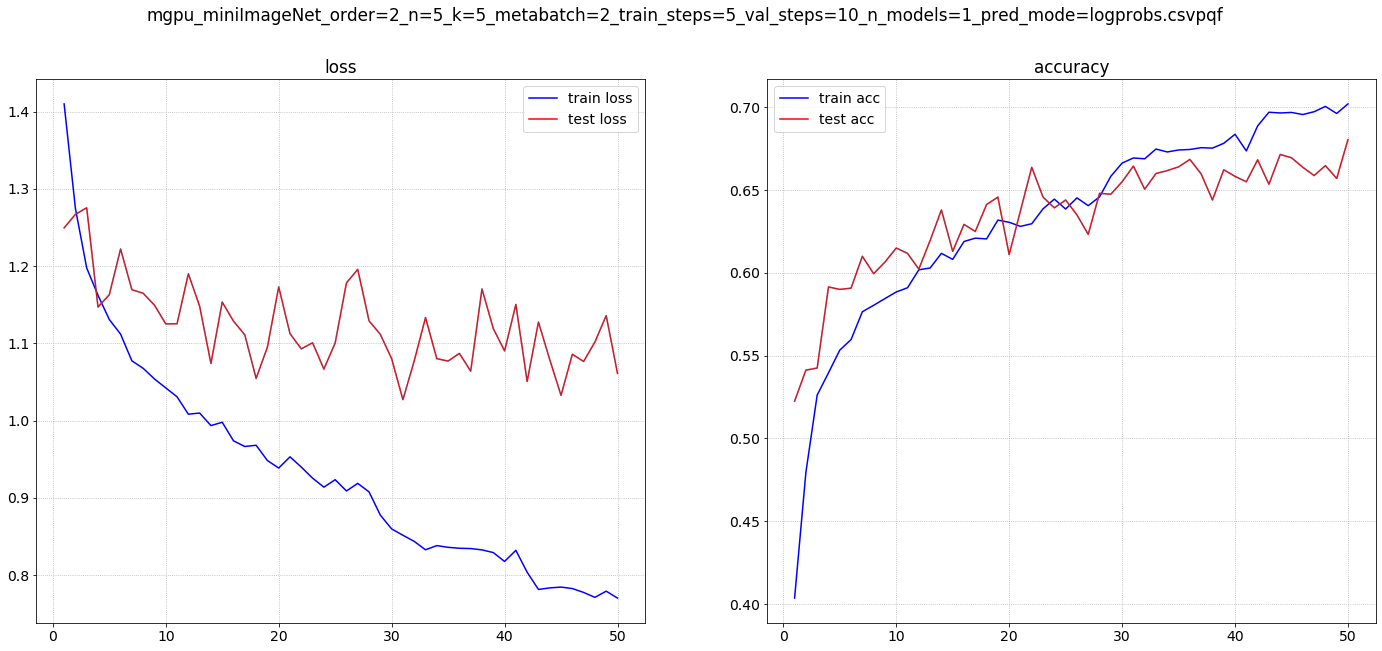

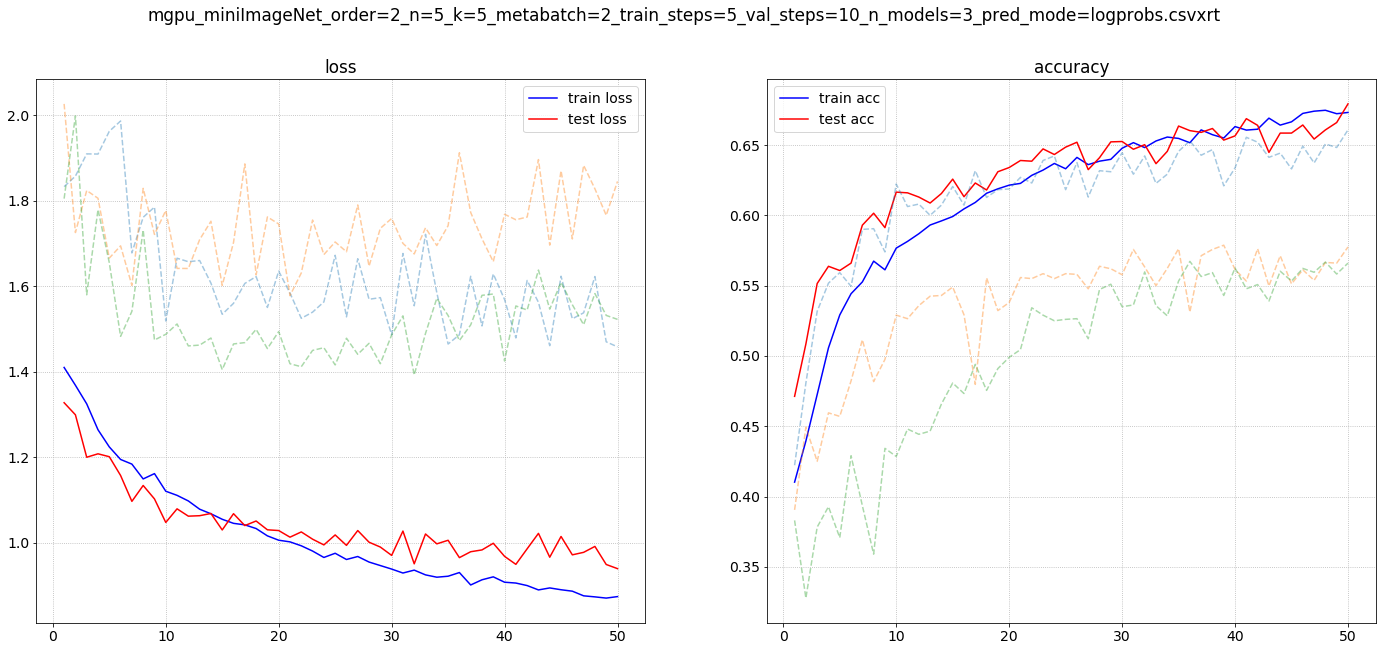

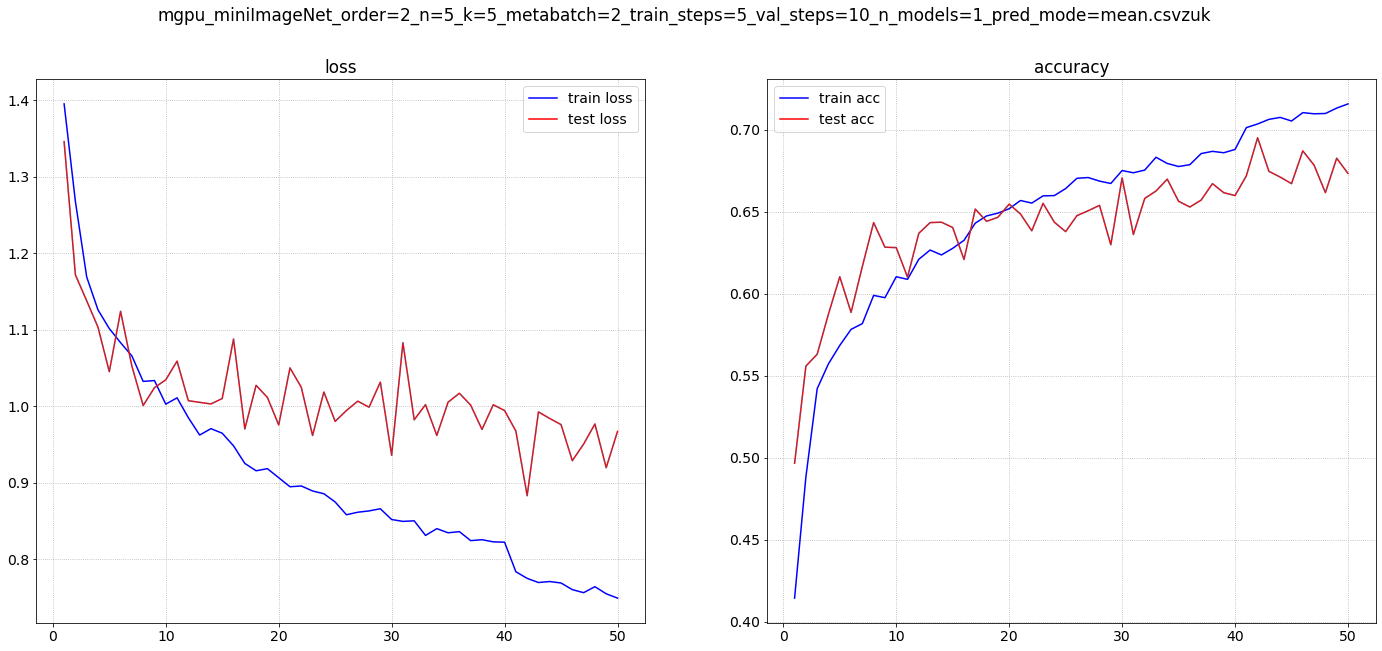

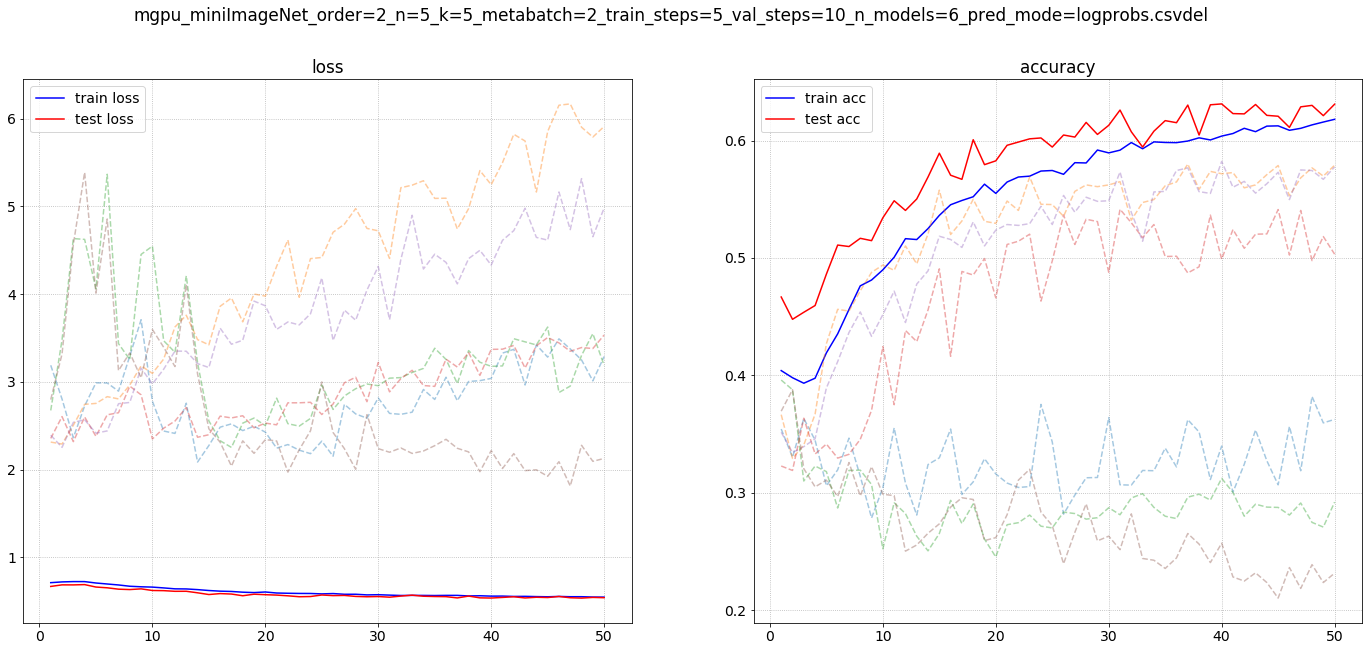

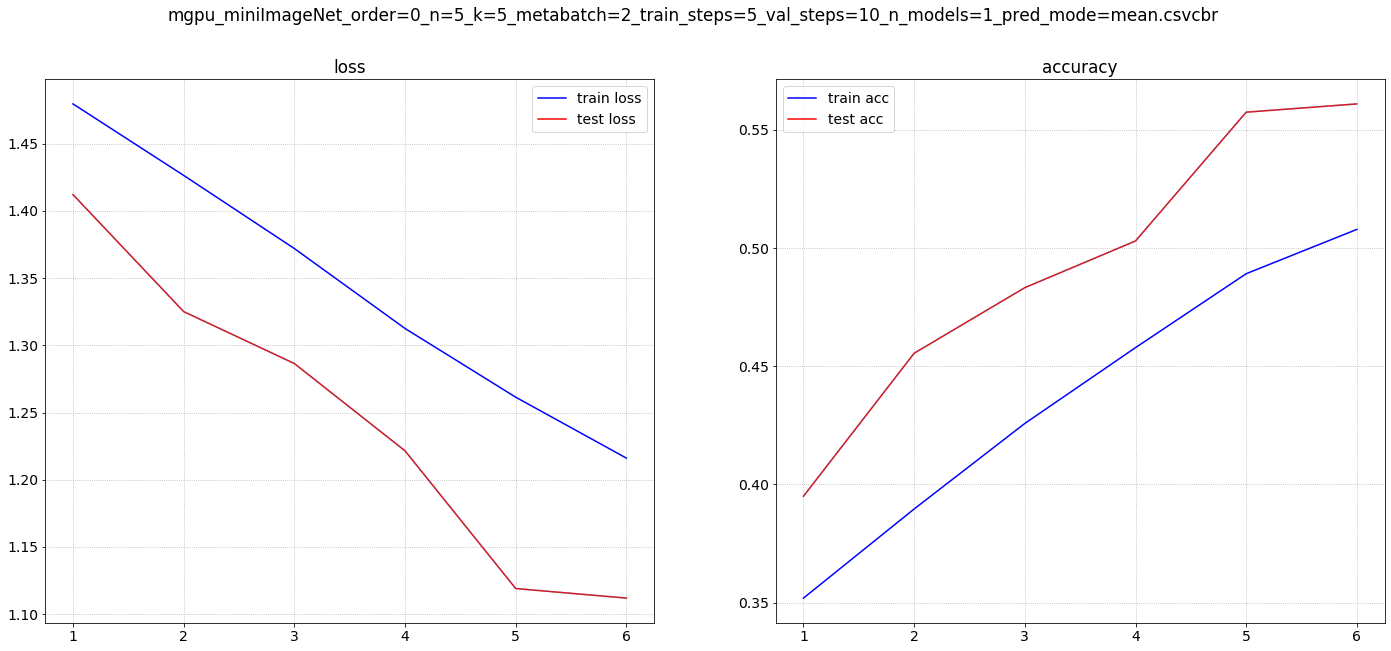

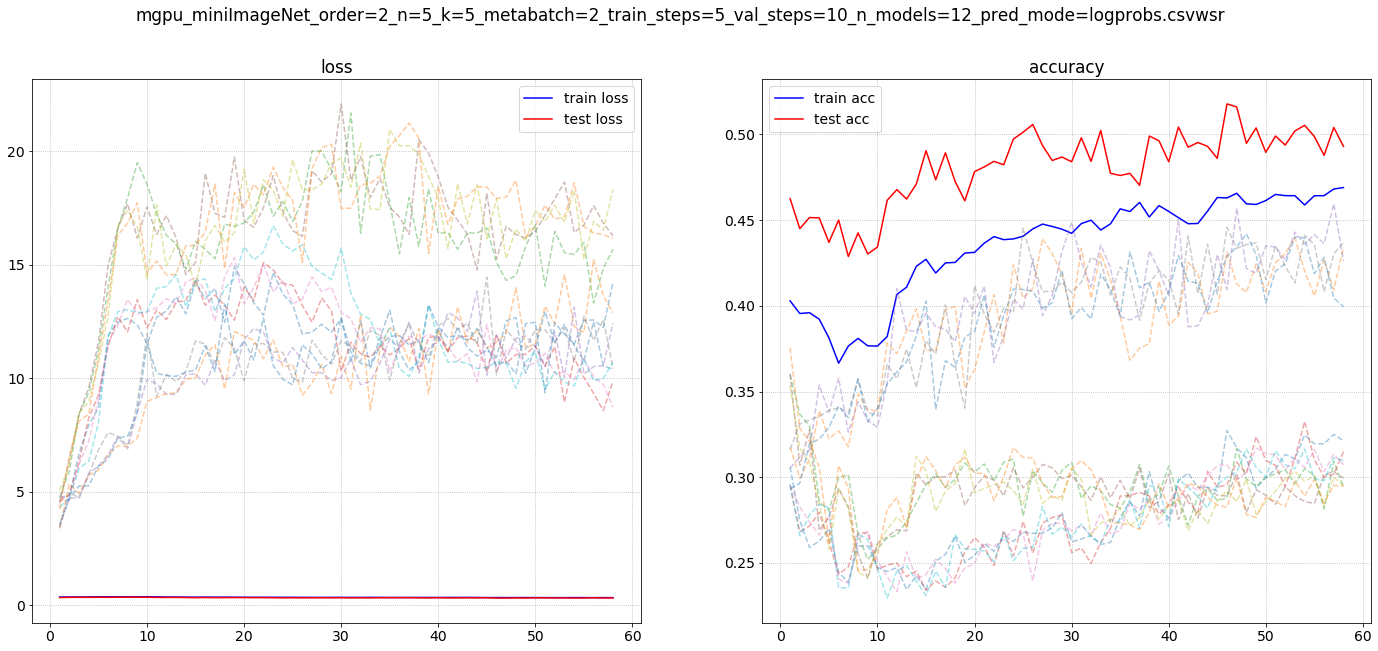

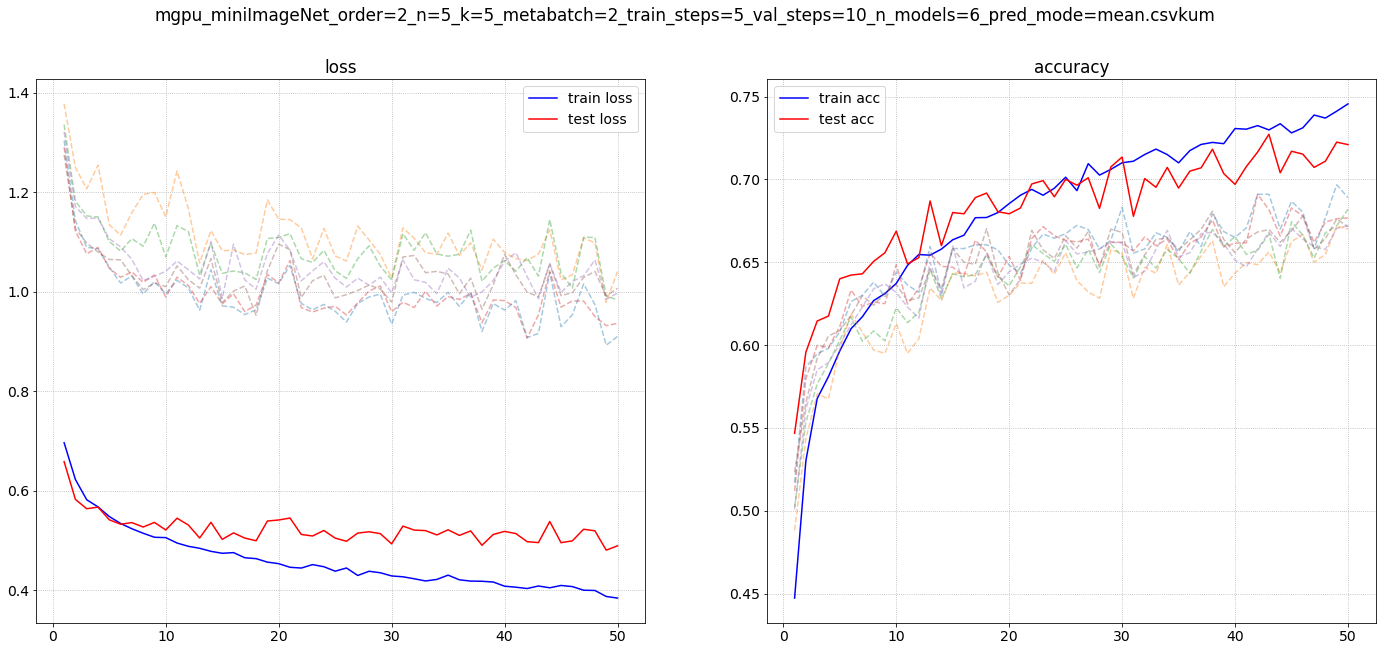

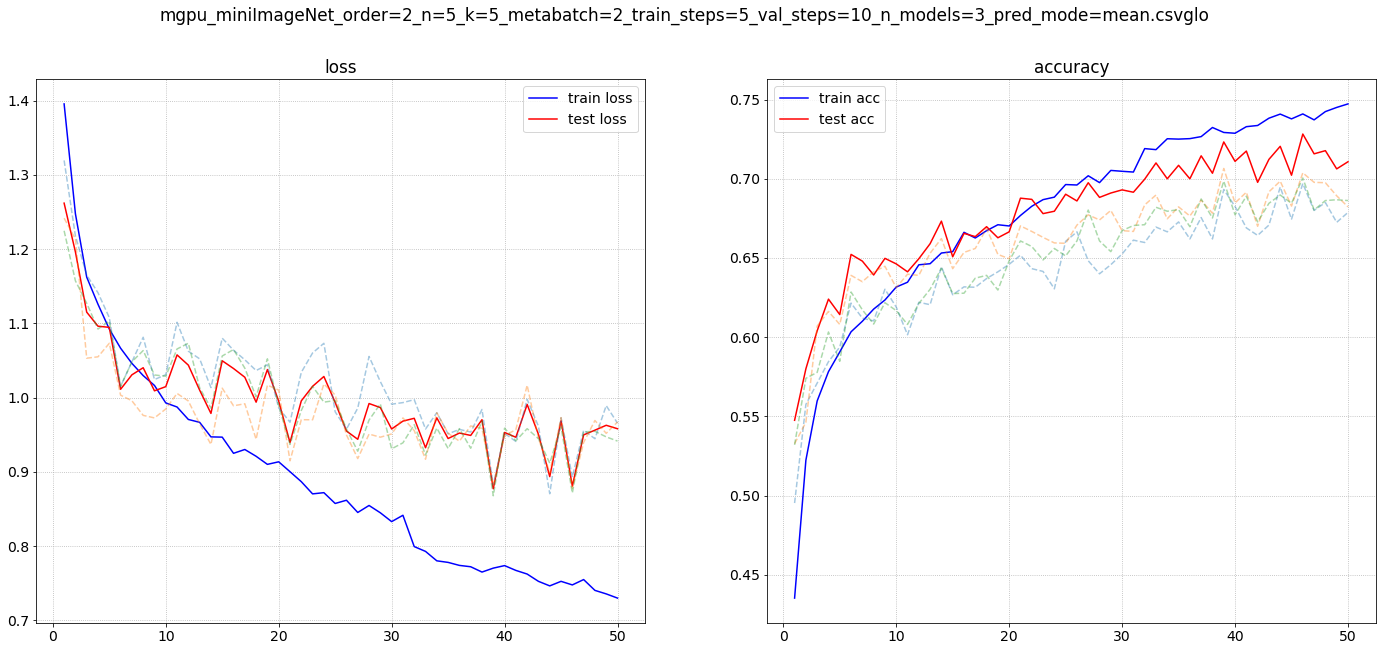

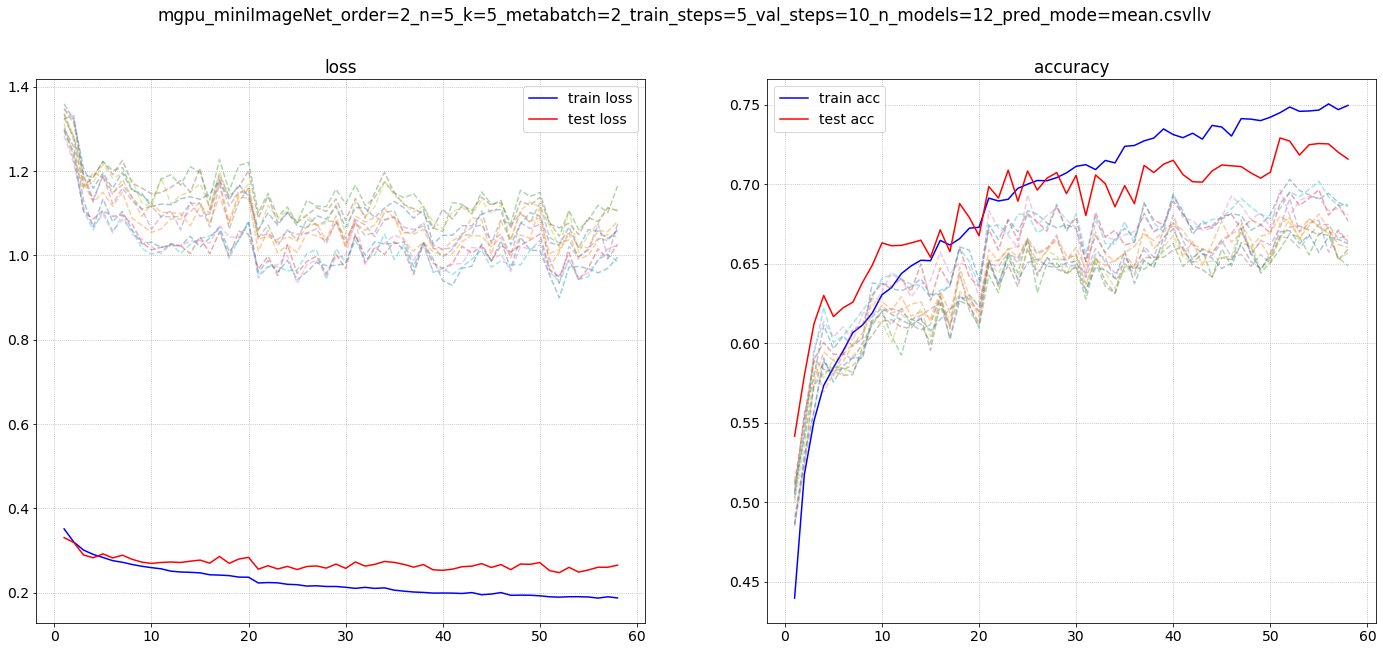

In [20]:
for name in names:
    draw_one(name)

In [26]:
names = names[0:3]

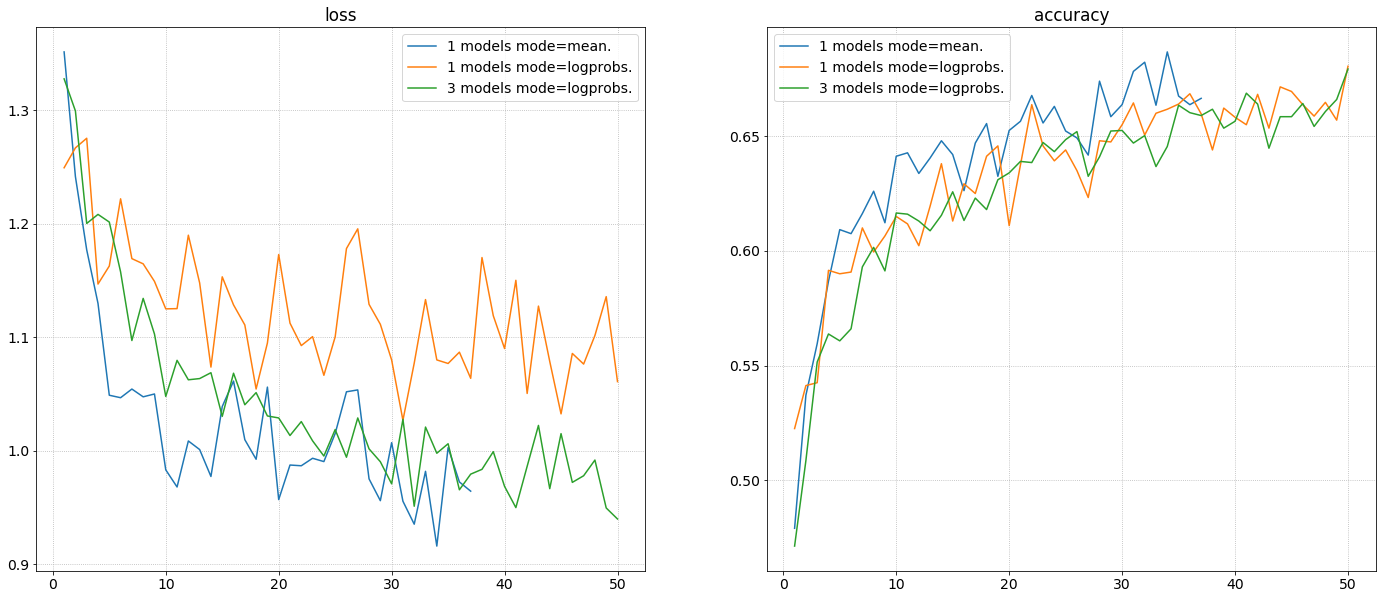

In [27]:
draw_many(names)